## REgresión Logística con scikit-learn Introducción (Parte 1)
Vamos a estudiar un problema simple de clasificación.  
Suponer que le preguntamos a 20 estudiantes que están realizando un examen, cuanto tiempo gastaron en prepararse para el examen y se obtuvieron los siguientes  resultados en horas:

In [10]:
# importaciones necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

In [11]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 3.75, 
                  4., 4.25, 4.5, 4.75, 5., 5.5])

In [12]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

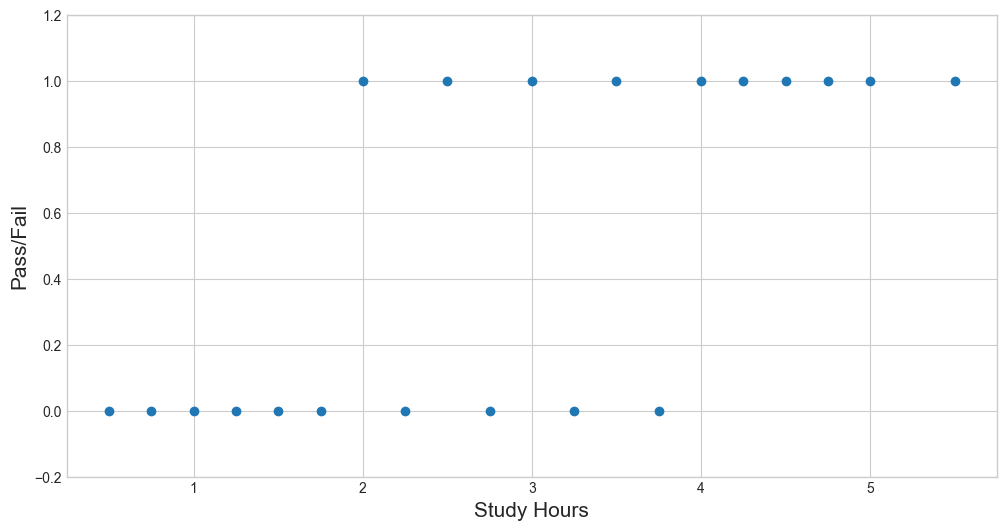

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

En la gráfica anterior en el eje X están las horas de estudio y en el eje Y los resultados del examen (Pasó/Falló), donde un uno corresponde a aprobar y un cero a reprobar. Se puede ver, obviamente, que un estudiante que pasa más horas estudiando aprueba con seguridad.  
También se observa una especie de solapaje, es decir, se muestran resultados que con un menor número de horas dedicadas a estudiar también aprueban el examen.  
Para entender mejor este suceso, vamos a crear un dataframe llamado data:

In [14]:
data = pd.DataFrame({"hours": hours, "success": success})

In [15]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,2.00,1
7,2.25,0
8,2.50,1
9,2.75,0


A modo de prueba, vamos a realizar un ajuste de regresión lineal y analizar un poco los resultados.  
Para ello escogemos las columnas hours y success como variables independiente y dependiente respectivamente:

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression(fit_intercept=True)

In [18]:
lm.fit(data.hours.to_frame(), data.success)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lm.coef_

array([0.23651361])

In [20]:
lm.intercept_

np.float64(-0.1829330608073586)

In [21]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.064676
1,0.75,0,-0.005548
2,1.00,0,0.053581
3,1.25,0,0.112709
4,1.50,0,0.171837
5,1.75,0,0.230966
6,2.00,1,0.290094
7,2.25,0,0.349223
8,2.50,1,0.408351
9,2.75,0,0.467479


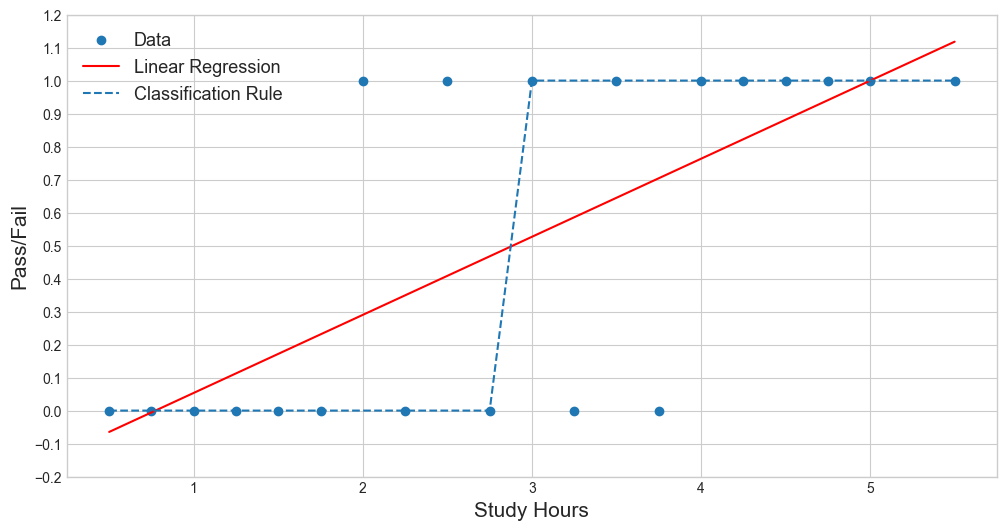

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")

"""En la gráfica se usa la regla de clasificación: si la predicción es mayor a 0.5 se asigna 1 en caso contrario
se asigna 0, esto se implementa en la instrucción que sigue"""
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()


Claramente se puede ver que la predicción falla basada en un modelo de regresión lineal.  
Sin embargo, si se usa una regla de clasificación basada en el modelo de regresión lineal vemos que el modelo clasifica bastante bien, salvo por 5 puntos que quedan sin clasificar.

## Regresión Logística con scikit-learn - Introducción (Parte 2)
En la lección anterior resultó que el modelo de regresión lineal no es conveniente para aplicarlo al pronóstico de rendimientos positivos del instrumento financiero.  
Quizás el mejor y más simple modelo a aplicar en estos casos es la Regresión Logística, el cual se va a aplicar en esta lección.  

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lm = LogisticRegression()

In [25]:
data

,hours,success,pred
0,0.50,0,-0.064676
1,0.75,0,-0.005548
2,1.00,0,0.053581
3,1.25,0,0.112709
4,1.50,0,0.171837
5,1.75,0,0.230966
6,2.00,1,0.290094
7,2.25,0,0.349223
8,2.50,1,0.408351
9,2.75,0,0.467479


In [26]:
# vamos a ajustar los datos a un modelo de regresión logística
lm.fit(data.hours.to_frame(), data.success)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
"""la columna pred anterior que fue calculada con regresión lineal se va a sobreescribir 
con la predicción del modelo de regresión logística"""
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,2.00,1,0
7,2.25,0,0
8,2.50,1,0
9,2.75,0,0


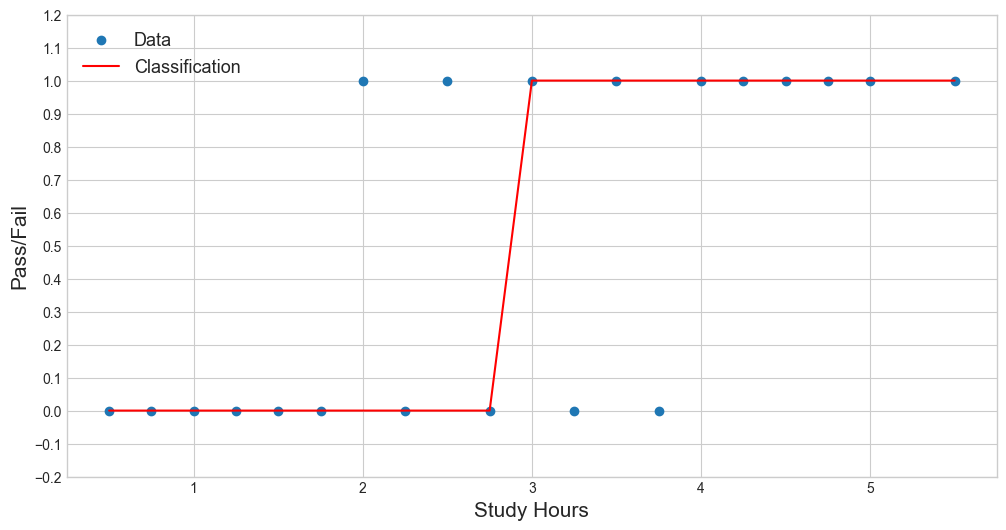

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()


en la gráfica anterior vemos que el modelo de regresión logística predice con un 1 para aprobar o con un 0 para reprobar, o sea este modelo es mejor para tareas de clasificación.
también se puede ver en la gráfica que el modelo de regresión logística es un poquito mejor que el modelo de regresión lineal, porque este resultado arroja 4 puntos que no son correctamente clasificados, en tanto que el modelo lineal no clasifica correctamente 5 puntos.  
Con respecto a la realización (performance) de la regresión logística, se puede decir que en el mundo real no siempre es suficiente estudiar muchas horas para aprobar un examen (influyen una cantidad de factores en la probabilidad de aprobar un examen), en la misma forma hay muchos estudiantes que requieren menos horas de estudio para aprobar un examen (por ejemplo un estudiante con un alto IQ).  
Sin embargo, en líneas generales se puede decir que incrementar las horas de estudio incrementará la probabilidad de aprobar unb examen, que es el resultado global que nos da el modelo de regresión logística.  
En realidad, la regresión logística lo que hace es calcular las probabilidades de aprobar y de reprobar y convierte estas probabilidades en un 1 o en un 0, dado que una probabilidad calculada sea mayor o menor al 50% respectivamente. 
Estas probabilidades también se pueden calcular usando el método predict_proba(): 

In [29]:
# calculamos las probabilidades de aprobar o reprobar el examen
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.93977556, 0.06022444],
       [0.92120531, 0.07879469],
       [0.89753325, 0.10246675],
       [0.86777029, 0.13222971],
       [0.83099014, 0.16900986],
       [0.78649656, 0.21350344],
       [0.7340385 , 0.2659615 ],
       [0.67403333, 0.32596667],
       [0.6077249 , 0.3922751 ],
       [0.53718955, 0.46281045],
       [0.46513366, 0.53486634],
       [0.39450427, 0.60549573],
       [0.32802241, 0.67197759],
       [0.26778916, 0.73221084],
       [0.21507624, 0.78492376],
       [0.17032587, 0.82967413],
       [0.13330528, 0.86669472],
       [0.10332904, 0.89667096],
       [0.07947542, 0.92052458],
       [0.04622324, 0.95377676]])

Cuando se calculan las probabilidades con el método predict_proba() el resultado es un arreglo de numpy que tiene 2 columnas, como se puede ver arriba.  
La primera columna corresponde a la probabilidad de que el dato repruebe el examen y la segunda columna corresponde a la probabilidad de aprobar (para el mismo dato o número de horas). Notar que la suma de las 2 columnas para un dato (una fila) debe dar 1.

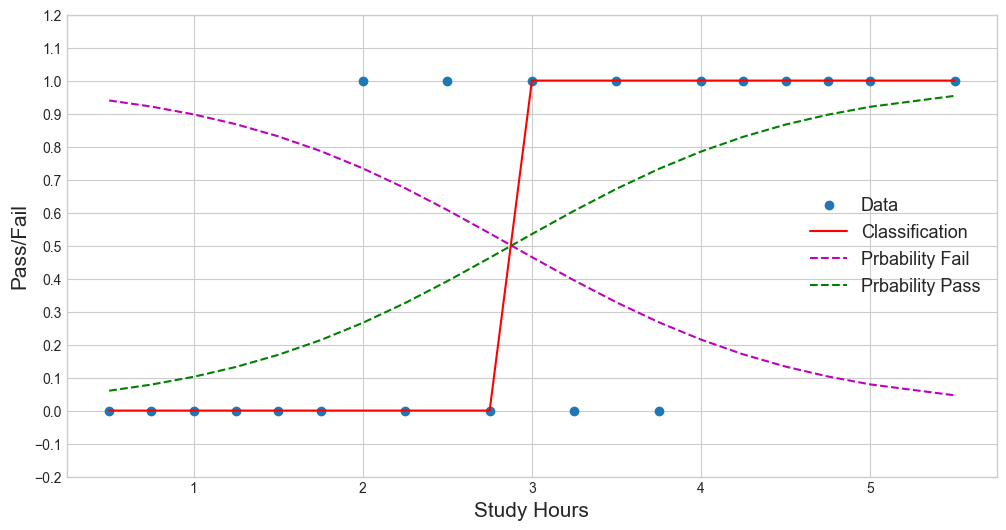

In [30]:
# ahora se grafican estas probabilidades
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Prbability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Prbability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()
